In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tqdm import tqdm
import itertools

from brian2 import *
import numpy as np
from lmfit import Model, Parameters

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import gridspec
from mpl_toolkits.mplot3d import axes3d
import matplotlib.patheffects as PathEffects

import MotionClouds as mc

import sys
sys.path.append('..')

from utils import data as ut_data
from utils import plotting as ut_plot
from utils import inputs as ut_inp

INFO       Cache size for target "cython": 1164 MB.
You can call "clear_cache('cython')" to delete all files from the cache or manually delete files in the "/home/hugo/.cython/brian_extensions" directory. [brian2]


# Figures notebook
NPG palettes available at https://nanx.me/ggsci/reference/pal_npg.html

## Figure 1 - Network structure visualisation

In [3]:
N_X, N_Y = 128, 128

n_pop_e = 360
n_pop_i = n_pop_e // 4 

e_radius = 1 
i_radius = .8 

In [4]:
e_xs = e_radius * np.cos(np.arange(0,n_pop_e) * 2 * np.pi / n_pop_e )
e_ys = e_radius * np.sin(np.arange(0,n_pop_e) * 2 * np.pi / n_pop_e )
i_xs = i_radius * np.cos(np.arange(0,n_pop_i) * 2 * np.pi / n_pop_i )
i_ys = i_radius * np.sin(np.arange(0,n_pop_i) * 2 * np.pi / n_pop_i )

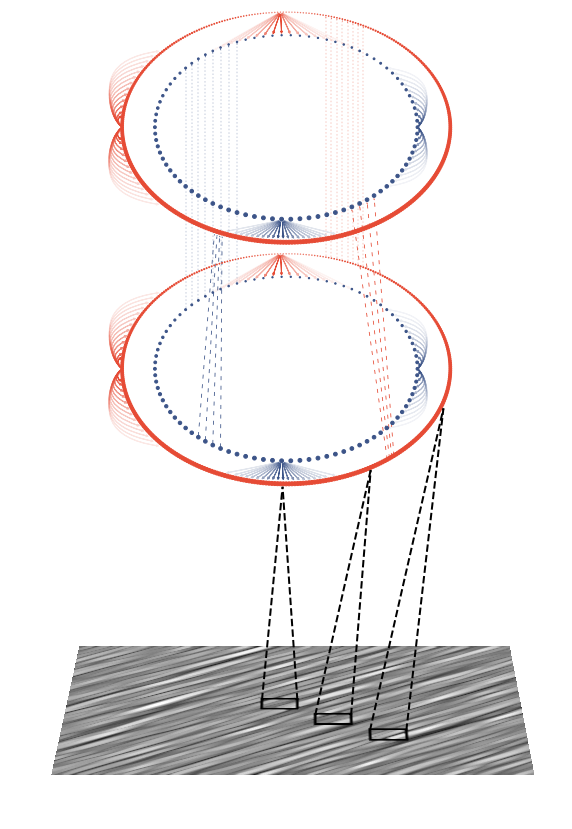

In [5]:
fig = plt.figure(figsize=(10, 15))
gs = gridspec.GridSpec(2, 1, height_ratios = [2,1])

ax = plt.subplot(gs[0])

exc_color = r'#E64B35'  # 'r'
inh_color = r'#3C5488'  # 'b'


# Neurons
plt.scatter(e_xs, e_ys, c=exc_color, s=8*(-e_ys+np.abs(np.min(e_ys))) + .1, zorder = 500)
plt.scatter(i_xs, i_ys, c=inh_color, s=8*(-i_ys+np.abs(np.min(e_ys))) + .1, zorder = 500)

plt.scatter(e_xs, e_ys+2.1, c=exc_color, s=8 *
            (-e_ys+np.abs(np.min(e_ys)+2.)) + .1)
plt.scatter(i_xs, i_ys+2.1, c=inh_color, s=8 *
            (-i_ys+np.abs(np.min(e_ys)+2.)) + .1)


# e_e connectivity
idxfrom = 180
naxones = 40

style = "Simple,tail_width=0.2,head_width=2,head_length=2"
kw = dict(arrowstyle=style, edgecolor=exc_color)
alphas = 1/np.exp(np.linspace(0, 2.5*e, naxones))

for i, x in enumerate(np.linspace(5, naxones, naxones//3, dtype=int)):

    a1 = patches.FancyArrowPatch((e_xs[idxfrom], e_ys[idxfrom]),
                                 (e_xs[idxfrom+x], e_ys[idxfrom+x]-.03),
                                 facecolor='none',
                                 connectionstyle="arc3,rad=.75", alpha=alphas[i],
                                 **kw)
    ax.add_patch(a1)

for i, x in enumerate(np.linspace(-5, -naxones, naxones//3, dtype=int)):
    a1 = patches.FancyArrowPatch((e_xs[idxfrom], e_ys[idxfrom]),
                                 (e_xs[idxfrom+x], e_ys[idxfrom+x]+.02),
                                 facecolor='none',
                                 connectionstyle="arc3,rad=-.75", alpha=alphas[i],
                                 **kw)
    ax.add_patch(a1)

# samel2
idxfrom = 180
naxones = 40

style = "Simple,tail_width=0.2,head_width=2,head_length=2"
kw = dict(arrowstyle=style, edgecolor=exc_color)
alphas = 1/np.exp(np.linspace(0, 2.5*e, naxones))

for i, x in enumerate(np.linspace(5, naxones, naxones//3, dtype=int)):

    a1 = patches.FancyArrowPatch((e_xs[idxfrom], e_ys[idxfrom]+2.1),
                                 (e_xs[idxfrom+x], e_ys[idxfrom+x]-.03+2.1),
                                 facecolor='none',
                                 connectionstyle="arc3,rad=.75", alpha=alphas[i],
                                 **kw)
    ax.add_patch(a1)

for i, x in enumerate(np.linspace(-5, -naxones, naxones//3, dtype=int)):
    a1 = patches.FancyArrowPatch((e_xs[idxfrom], e_ys[idxfrom]+2.1),
                                 (e_xs[idxfrom+x], e_ys[idxfrom+x]+.02+2.1),
                                 facecolor='none',
                                 connectionstyle="arc3,rad=-.75", alpha=alphas[i],
                                 **kw)
    ax.add_patch(a1)

# i_i connectivity
idxfrom = 0
naxones = 10
kw = dict(arrowstyle=style, edgecolor=inh_color)
alphas = 1/np.exp(np.linspace(0, 1.*e, naxones))

for i, x in enumerate(np.linspace(1, naxones, naxones//1, dtype=int)):

    a1 = patches.FancyArrowPatch((i_xs[idxfrom], i_ys[idxfrom]),
                                 (i_xs[idxfrom+x], i_ys[idxfrom+x]),
                                 facecolor='none',
                                 connectionstyle="arc3,rad=.75", alpha=alphas[i],
                                 **kw)
    ax.add_patch(a1)

for i, x in enumerate(np.linspace(-1, -naxones, naxones//1, dtype=int)):
    a1 = patches.FancyArrowPatch((i_xs[idxfrom], i_ys[idxfrom]),
                                 (i_xs[idxfrom+x], i_ys[idxfrom+x]),
                                 facecolor='none',
                                 connectionstyle="arc3,rad=-.75", alpha=alphas[i],
                                 **kw)
    ax.add_patch(a1)


# samel2
idxfrom = 0
naxones = 10
kw = dict(arrowstyle=style, edgecolor=inh_color)
alphas = 1/np.exp(np.linspace(0, 1.*e, naxones))

for i, x in enumerate(np.linspace(1, naxones, naxones//1, dtype=int)):

    a1 = patches.FancyArrowPatch((i_xs[idxfrom], i_ys[idxfrom]+2.1),
                                 (i_xs[idxfrom+x], i_ys[idxfrom+x]+2.1),
                                 facecolor='none',
                                 connectionstyle="arc3,rad=.75", alpha=alphas[i],
                                 **kw)
    ax.add_patch(a1)

for i, x in enumerate(np.linspace(-1, -naxones, naxones//1, dtype=int)):
    a1 = patches.FancyArrowPatch((i_xs[idxfrom], i_ys[idxfrom]+2.1),
                                 (i_xs[idxfrom+x], i_ys[idxfrom+x]+2.1),
                                 facecolor='none',
                                 connectionstyle="arc3,rad=-.75", alpha=alphas[i],
                                 **kw)
    ax.add_patch(a1)


# e_i connectivity
idxfrom = 92
naxones = 8
kw = dict(arrowstyle=style, edgecolor=exc_color)
alphas = 1/np.exp(np.linspace(0, 1.*e, naxones))

for i, x in enumerate(np.linspace(1, naxones, naxones//1, dtype=int)):

    a1 = patches.FancyArrowPatch((e_xs[idxfrom], e_ys[idxfrom]),
                                 (i_xs[(idxfrom//4)+x], i_ys[(idxfrom//4)+x]),
                                 facecolor='none',
                                 connectionstyle="arc3,rad=.01", alpha=alphas[i],
                                 **kw)
    ax.add_patch(a1)

for i, x in enumerate(np.linspace(0, -naxones, naxones//1, dtype=int)):
    a1 = patches.FancyArrowPatch((e_xs[idxfrom], e_ys[idxfrom]),
                                 (i_xs[(idxfrom//4)+x], i_ys[(idxfrom//4)+x]),
                                 facecolor='none',
                                 connectionstyle="arc3,rad=-.01", alpha=alphas[i],
                                 **kw)
    ax.add_patch(a1)


# samel2
idxfrom = 92
naxones = 8
kw = dict(arrowstyle=style, edgecolor=exc_color)
alphas = 1/np.exp(np.linspace(0, 1.*e, naxones))

for i, x in enumerate(np.linspace(1, naxones, naxones//1, dtype=int)):

    a1 = patches.FancyArrowPatch((e_xs[idxfrom], e_ys[idxfrom]+2.1),
                                 (i_xs[(idxfrom//4)+x],
                                  i_ys[(idxfrom//4)+x]+2.1),
                                 facecolor='none',
                                 connectionstyle="arc3,rad=.01", alpha=alphas[i],
                                 **kw)
    ax.add_patch(a1)

for i, x in enumerate(np.linspace(0, -naxones, naxones//1, dtype=int)):
    a1 = patches.FancyArrowPatch((e_xs[idxfrom], e_ys[idxfrom]+2.1),
                                 (i_xs[(idxfrom//4)+x],
                                  i_ys[(idxfrom//4)+x]+2.1),
                                 facecolor='none',
                                 connectionstyle="arc3,rad=-.01", alpha=alphas[i],
                                 **kw)
    ax.add_patch(a1)

# i_e connectivity
idxfrom = 67
naxones = 20
kw = dict(arrowstyle=style, edgecolor=inh_color)
alphas = 1/np.exp(np.linspace(0, 1.5*e, naxones))

for i, x in enumerate(np.linspace(1, naxones, naxones//2, dtype=int)):

    a1 = patches.FancyArrowPatch((i_xs[idxfrom]+.005, i_ys[idxfrom]-.008),
                                 (e_xs[(idxfrom*4)+x],
                                  e_ys[(idxfrom*4)+x]+.02),
                                 facecolor='none',
                                 connectionstyle="arc3,rad=.01", alpha=alphas[i],
                                 **kw)
    ax.add_patch(a1)

for i, x in enumerate(np.linspace(-1, -naxones, naxones//2, dtype=int)):
    a1 = patches.FancyArrowPatch((i_xs[idxfrom] - .005, i_ys[idxfrom]-.008),
                                 (e_xs[(idxfrom*4)+x],
                                  e_ys[(idxfrom*4)+x]+.02),
                                 facecolor='none',
                                 connectionstyle="arc3,rad=-.01", alpha=alphas[i],
                                 **kw)
    ax.add_patch(a1)


# samel2
idxfrom = 67
naxones = 20
kw = dict(arrowstyle=style, edgecolor=inh_color)
alphas = 1/np.exp(np.linspace(0, 1.5*e, naxones))

for i, x in enumerate(np.linspace(1, naxones, naxones//2, dtype=int)):

    a1 = patches.FancyArrowPatch((i_xs[idxfrom]+.005, i_ys[idxfrom]-.008+2.1),
                                 (e_xs[(idxfrom*4)+x],
                                  e_ys[(idxfrom*4)+x]+.02+2.1),
                                 facecolor='none',
                                 connectionstyle="arc3,rad=.01", alpha=alphas[i],
                                 **kw)
    ax.add_patch(a1)

for i, x in enumerate(np.linspace(-1, -naxones, naxones//2, dtype=int)):
    a1 = patches.FancyArrowPatch((i_xs[idxfrom] - .005, i_ys[idxfrom]-.008+2.1),
                                 (e_xs[(idxfrom*4)+x],
                                  e_ys[(idxfrom*4)+x]+.02+2.1),
                                 facecolor='none',
                                 connectionstyle="arc3,rad=-.01", alpha=alphas[i],
                                 **kw)
    ax.add_patch(a1)


# e_e layer connectivity, using arrow not arrowpatch
idxfrom = 70
naxones = 8
alphas = 1/np.exp(np.linspace(0, 1.5*e, naxones))

kw = dict(arrowstyle=style, edgecolor=exc_color)
for i, x in enumerate(np.arange(-naxones, naxones, 2, dtype=int)):
    plt.plot((e_xs[idxfrom+x], e_xs[idxfrom+x]),
             (e_ys[idxfrom+x]+.01, e_ys[idxfrom+x]+2.075),
             color=exc_color, linestyle=(0, (5, 7)),
             linewidth=.3,
             zorder=-1)

    plt.arrow(e_xs[idxfrom+x], e_ys[idxfrom+x]+2.075,
              0, .005,
              color=exc_color, linewidth=.1 *
              (-e_ys[idxfrom+x]+np.abs(np.min(e_ys))),
              head_width=.0075,
              zorder=-1)


# i_i layer connectivity, using arrow not arrowpatch
idxfrom = 32
naxones = 4
alphas = 1/np.exp(np.linspace(0, 1.5*e, naxones))

kw = dict(arrowstyle=style, edgecolor=inh_color)
for i, x in enumerate(np.arange(-naxones, naxones, 1, dtype=int)):
    plt.plot((i_xs[idxfrom+x], i_xs[idxfrom+x]),
             (i_ys[idxfrom+x]+.01, i_ys[idxfrom+x]+2.075),
             color=inh_color, linestyle=(0, (5, 7)),
             linewidth = .3,
             zorder=-1)

    plt.arrow(i_xs[idxfrom+x], i_ys[idxfrom+x]+2.075,
              0, .005,
              color=inh_color, linewidth=.1 *
              (-e_ys[idxfrom+x]+np.abs(np.min(e_ys))),
              head_width=.0075,
              zorder=-1)


# i_e layer connectivity, using arrow not arrowpatch
idxfrom = 59
naxones = 2
alphas = 1/np.exp(np.linspace(0, 1.5*e, naxones))

kw = dict(arrowstyle=style, edgecolor=inh_color)
for i, x in enumerate(np.arange(-naxones, naxones, 1, dtype=int)):
    plt.plot((i_xs[idxfrom+x], e_xs[4*idxfrom+x+10]),
             (i_ys[idxfrom+x]+.01, e_ys[(4*idxfrom)+x+10]+2.055),
             color=inh_color, linestyle=(0, ((5, 7))),
             linewidth=.8,
             zorder=-1)

    plt.arrow(e_xs[4*idxfrom+x+10], e_ys[(4*idxfrom)+x+10]+2.055,
              .00075, .005,
              color=inh_color, linewidth=.1 *
              (-e_ys[idxfrom+x]+np.abs(np.min(e_ys))),
              head_width=.0075,
              zorder=-1)


# e_i layer connectivity, using arrow not arrowpatch
idxfrom = 310
naxones = 2

kw = dict(arrowstyle=style, edgecolor=exc_color)
for i, x in enumerate(np.arange(-naxones, naxones, 1, dtype=int)):
    plt.plot((e_xs[idxfrom+x], i_xs[idxfrom//4+x]+.002),
             (e_ys[idxfrom+x], i_ys[idxfrom//4+x]+2.061),
             color=exc_color, linestyle=(0, (5, 7)),
             linewidth=.8,
             zorder=-1)

    plt.arrow(i_xs[idxfrom//4+x]+.002, i_ys[idxfrom//4+x]+2.061,
              -0.001, .005,
              color=exc_color, linewidth=.1 *
              (-e_ys[idxfrom+x]+np.abs(np.min(e_ys))),
              head_width=.0075,
              zorder=-1)


ax.set_xlim(-1.7, 1.7)
ax.set_ylim(-1.05, 3.15)







ax2 = plt.subplot(gs[1], projection = '3d')

xx, yy = np.meshgrid(np.arange(0, 256), np.arange(0,256))
im = ut_inp.generate_cloud(np.pi/4, np.pi/36, .1, 256, 256, 42)

s = 20

x0 = 109
wx = 2
wy = 5
im[x0:x0+s, x0:x0+wy] = 0
im[x0:x0+wx, x0:x0+s]= 0
im[x0:x0+s, x0+s:x0+s+wy] = 0
im[x0+s:x0+s+wx, x0:x0+s+wy] = 0

ax2.plot((x0+5, 126),(x0+.5,122), (0,.21), clip_on = False, color = 'k', zorder = 100,
        linewidth = 2, linestyle = '--')
ax2.plot((x0+5, 126),(x0+20+.5,122), (0,.21), clip_on = False, color = 'k', zorder = 100,
        linewidth = 2, linestyle = '--')


x0 = 139
wx = 2
wy = 5
im[x0:x0+s, x0:x0+wy] = 0
im[x0:x0+wx, x0:x0+s] = 0
im[x0:x0+s, x0+s:x0+s+wy] = 0
im[x0+s:x0+s+wx, x0:x0+s+wy] = 0

ax2.plot((x0+5, 126),(x0+.5,165), (0,.224), clip_on = False, color = 'k', zorder = 100,
        linewidth = 2, linestyle = '--')
ax2.plot((x0+5, 126),(x0+20+.5,165), (0,.224), clip_on = False, color = 'k', zorder = 100,
        linewidth = 2, linestyle = '--')


x0 = 169
wx = 2
wy = 5
im[x0:x0+s, x0:x0+wy] = 0
im[x0:x0+wx, x0:x0+s] = 0
im[x0:x0+s, x0+s:x0+s+wy] = 0
im[x0+s:x0+s+wx, x0:x0+s+wy] = 0

ax2.plot((x0+5, 126),(x0+.5,198), (0,.273), clip_on = False, color = 'k', zorder = 100,
        linewidth = 2, linestyle = '--')
ax2.plot((x0+5, 126),(x0+20+.5,198), (0,.273), clip_on = False, color = 'k', zorder = 100,
        linewidth = 2, linestyle = '--')


'''s = 254
x0 = 0
wx = 2
wy = 4
im[x0:x0+s, x0:x0+wy] = 0
im[x0:x0+wx, x0:x0+s] = 0
im[x0:x0+s, x0+s-2:x0+s+wy] = 0
im[x0+s:x0+s+wx, x0:x0+s+wy] = 0'''


ax2.contourf(xx, yy, im, 100,  offset=0., cmap='gray', zorder = 0)

ax2.set_zlim(-.08, .1)
ax2.view_init(elev = 40, azim = .2)
ax2.dist = 6.

plt.subplots_adjust(hspace = .25)
ax.axis('off')
ax2.axis('off')
plt.show()


fig.savefig('fig1_rings.pdf', format='pdf', bbox_inches = 'tight')
fig.savefig('fig1_rings.png', format='png', bbox_inches = 'tight')

## Figure 2 - MotionClouds + tuning curves + variations of parameters
## High precision

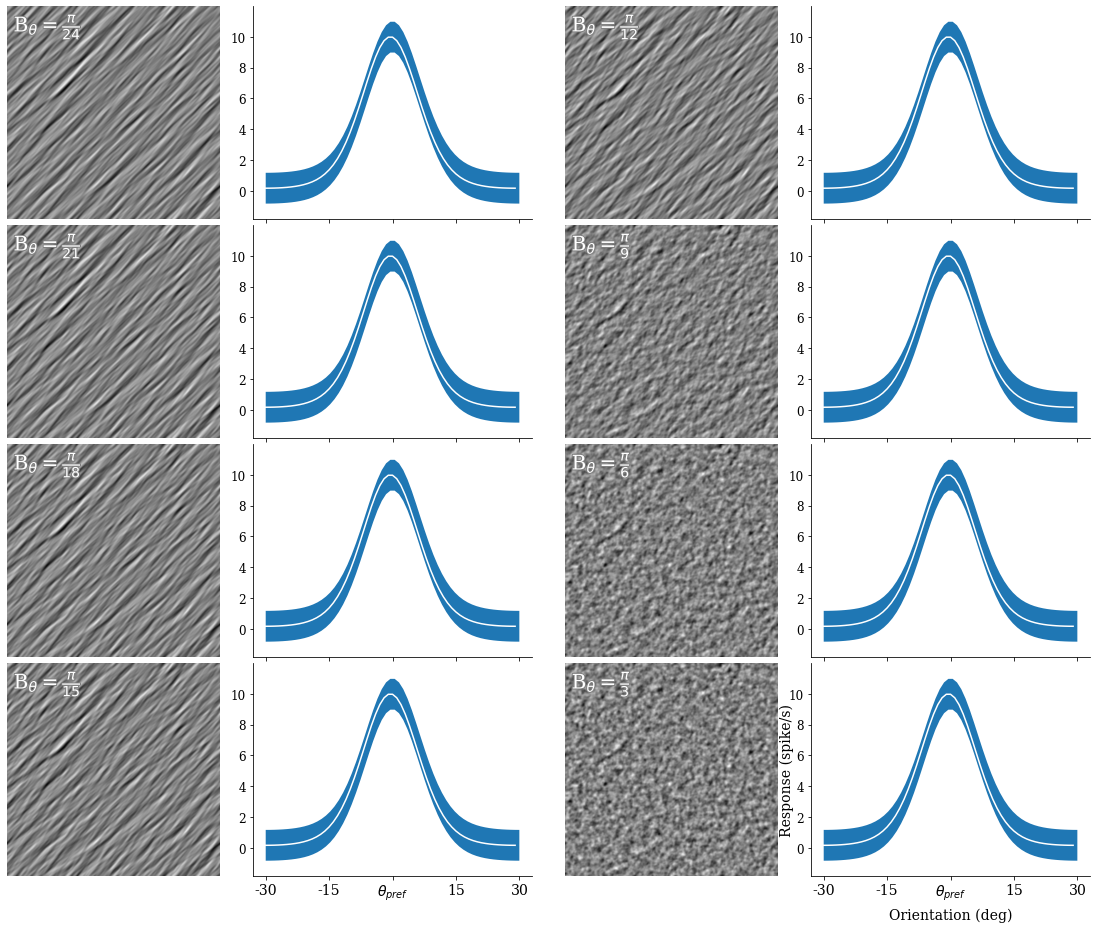

In [7]:
bthetas = np.linspace(np.pi/24, np.pi/15, 4)
N_pix = 512
sf = .05

faketc = ut_data.von_mises(xs=np.linspace(0, 60, 60), j=30, B=20, fmax=10)
ymin, ymax = np.min(faketc)-2, np.max(faketc)+2

xticks_vals = [0, 15, 30, 45, 60]

fig = plt.figure(figsize=(20, 16))
gs = gridspec.GridSpec(4, 4)  # , height_ratios = [2,1])
gs.update(wspace=0, hspace=.03)
plt.rc('font', family = 'serif')


ax1 = plt.subplot(gs[0])
im = ut_inp.generate_cloud(np.pi/4, bthetas[0], sf, N_pix, N_pix, 42)
ax1.imshow(im, cmap='gray', clim=(0, 1), interpolation = 'bilinear')
txt = ax1.text(15, 60, r'B$_{\theta} = \frac{\pi}{%.0f}$' % 24,
               c='w', fontsize=20)
txt.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='gray')])
ax1.axis('off')

ax2 = plt.subplot(gs[1])
ax2.plot(faketc, 'w')
ax2.fill_between(np.linspace(0, 60, 60), faketc+1, faketc-1)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(labelbottom=False)
ax2.set_xticks(xticks_vals)
ax2.set_ylim(ymin, ymax)


ax3 = plt.subplot(gs[4])
im = ut_inp.generate_cloud(np.pi/4, bthetas[1], sf, N_pix, N_pix, 42)
txt = ax3.text(15, 60, r'B$_{\theta} = \frac{\pi}{%.0f}$' % 21,
               c = 'w', fontsize = 20)
txt.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='gray')])
ax3.imshow(im, cmap = 'gray', clim = (0, 1), interpolation = 'bilinear')
ax3.axis('off')

ax4=plt.subplot(gs[5])
ax4.plot(faketc, 'w')
ax4.fill_between(np.linspace(0, 60, 60), faketc+1, faketc-1)
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax4.tick_params(labelbottom = False)
ax4.set_xticks(xticks_vals)
ax4.set_ylim(ymin, ymax)


ax5=plt.subplot(gs[8])
im=ut_inp.generate_cloud(np.pi/4, bthetas[2], sf, N_pix, N_pix, 42)
txt=ax5.text(15, 60, r'B$_{\theta} = \frac{\pi}{%.0f}$' % 18,
               c='w', fontsize=20)
txt.set_path_effects([PathEffects.withStroke(linewidth = 2, foreground = 'gray')])
ax5.imshow(im, cmap='gray', clim=(0, 1), interpolation = 'bilinear')
ax5.axis('off')

ax6=plt.subplot(gs[9])
ax6.plot(faketc, 'w')
ax6.fill_between(np.linspace(0, 60, 60), faketc+1, faketc-1)
ax6.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)
ax6.tick_params(axis='both', which='major', labelsize=12)
ax6.tick_params(labelbottom=False)
ax6.set_xticks(xticks_vals)
ax6.set_ylim(ymin, ymax)


ax7=plt.subplot(gs[12])
im=ut_inp.generate_cloud(np.pi/4, bthetas[3], sf, N_pix, N_pix, 42)
txt=ax7.text(15, 60, r'B$_{\theta} = \frac{\pi}{%.0f}$' % 15,
               c='w', fontsize=20)
txt.set_path_effects([PathEffects.withStroke(linewidth = 2, foreground = 'gray')])
ax7.imshow(im, cmap='gray', clim=(0, 1), interpolation = 'bilinear')
ax7.axis('off')


ax8=plt.subplot(gs[13])
ax8.plot(faketc, 'w')
ax8.fill_between(np.linspace(0, 60, 60), faketc+1, faketc-1)
ax8.spines['right'].set_visible(False)
ax8.spines['top'].set_visible(False)
ax8.tick_params(axis='both', which='major', labelsize=12)
ax8.set_xticks(xticks_vals)
ax8.set_xticklabels(['-30', '-15', r'$\theta_{pref}$', '15', '30'], fontsize = 14)
ax8.set_ylim(ymin, ymax)






bthetas = np.linspace(np.pi/12, np.pi/3, 4)

ax1 = plt.subplot(gs[2])
im = ut_inp.generate_cloud(np.pi/4, bthetas[0], sf, N_pix, N_pix, 42)
ax1.imshow(im, cmap='gray', clim=(0, 1), interpolation = 'bilinear')
txt = ax1.text(15, 60, r'B$_{\theta} = \frac{\pi}{%.0f}$' % 12,
               c='w', fontsize=20)
txt.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='gray')])
ax1.axis('off')

ax2 = plt.subplot(gs[3])
ax2.plot(faketc, 'w')
ax2.fill_between(np.linspace(0, 60, 60), faketc+1, faketc-1)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(labelbottom=False)
ax2.set_xticks(xticks_vals)
ax2.set_ylim(ymin, ymax)


ax3 = plt.subplot(gs[6])
im = ut_inp.generate_cloud(np.pi/4, bthetas[1], sf, N_pix, N_pix, 42)
txt = ax3.text(15, 60, r'B$_{\theta} = \frac{\pi}{%.0f}$' % 9,
               c = 'w', fontsize = 20)
txt.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='gray')])
ax3.imshow(im, cmap = 'gray', clim = (0, 1), interpolation = 'bilinear')
ax3.axis('off')

ax4=plt.subplot(gs[7])
ax4.plot(faketc, 'w')
ax4.fill_between(np.linspace(0, 60, 60), faketc+1, faketc-1)
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax4.tick_params(labelbottom = False)
ax4.set_xticks(xticks_vals)
ax4.set_ylim(ymin, ymax)


ax5=plt.subplot(gs[10])
im=ut_inp.generate_cloud(np.pi/4, bthetas[2], sf, N_pix, N_pix, 42)
txt=ax5.text(15, 60, r'B$_{\theta} = \frac{\pi}{%.0f}$' % 6,
               c='w', fontsize=20)
txt.set_path_effects([PathEffects.withStroke(linewidth = 2, foreground = 'gray')])
ax5.imshow(im, cmap='gray', clim=(0, 1), interpolation = 'bilinear')
ax5.axis('off')

ax6=plt.subplot(gs[11])
ax6.plot(faketc, 'w')
ax6.fill_between(np.linspace(0, 60, 60), faketc+1, faketc-1)
ax6.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)
ax6.tick_params(axis='both', which='major', labelsize=12)
ax6.tick_params(labelbottom=False)
ax6.set_xticks(xticks_vals)
ax6.set_ylim(ymin, ymax)


ax7=plt.subplot(gs[14])
im=ut_inp.generate_cloud(np.pi/4, bthetas[3], sf, N_pix, N_pix, 42)
txt=ax7.text(15, 60, r'B$_{\theta} = \frac{\pi}{%.0f}$' % 3,
               c='w', fontsize=20)
txt.set_path_effects([PathEffects.withStroke(linewidth = 2, foreground = 'gray')])
ax7.imshow(im, cmap='gray', clim=(0, 1), interpolation = 'bilinear')
ax7.axis('off')


ax8=plt.subplot(gs[15])
ax8.plot(faketc, 'w')
ax8.fill_between(np.linspace(0, 60, 60), faketc+1, faketc-1)
ax8.spines['right'].set_visible(False)
ax8.spines['top'].set_visible(False)
ax8.tick_params(axis='both', which='major', labelsize=12)
ax8.set_xticks(xticks_vals)
ax8.set_xticklabels(['-30', '-15', r'$\theta_{pref}$', '15', '30'], fontsize = 14)
ax8.set_ylim(ymin, ymax)
ax8.set_ylabel('Response (spike/s)', fontsize = 14, labelpad = -5)
ax8.set_xlabel('Orientation (deg)', fontsize = 14, labelpad = 5)



fig.savefig('fig1_btheta_tcs.pdf', format = 'pdf', bbox_inches = 'tight')
plt.show()